<a href="https://colab.research.google.com/github/kotsengkuba/aiaiai/blob/main/IrisClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris Dataset
iris = datasets.load_iris()

In [4]:
# Convert to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [39]:
# Define features x and target y
x = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")

Training samples: (105, 4), Testing samples: (45, 4)


In [40]:
# Init decision tree classifier
clf = DecisionTreeClassifier()

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


## Testing the prediction with new sample



In [48]:
# Define a new iris flower's measurements (sepal length, sepal width, petal length, petal width)
new_sample = np.array([[0.5, 10, 5.0, 80.0]])  # Example input

# Predict the species
prediction = clf.predict(new_sample)
species_name = iris.target_names[prediction]

print(f"The predicted species for the new sample is: {species_name}")

The predicted species for the new sample is: ['virginica']


## Adding some visualizations

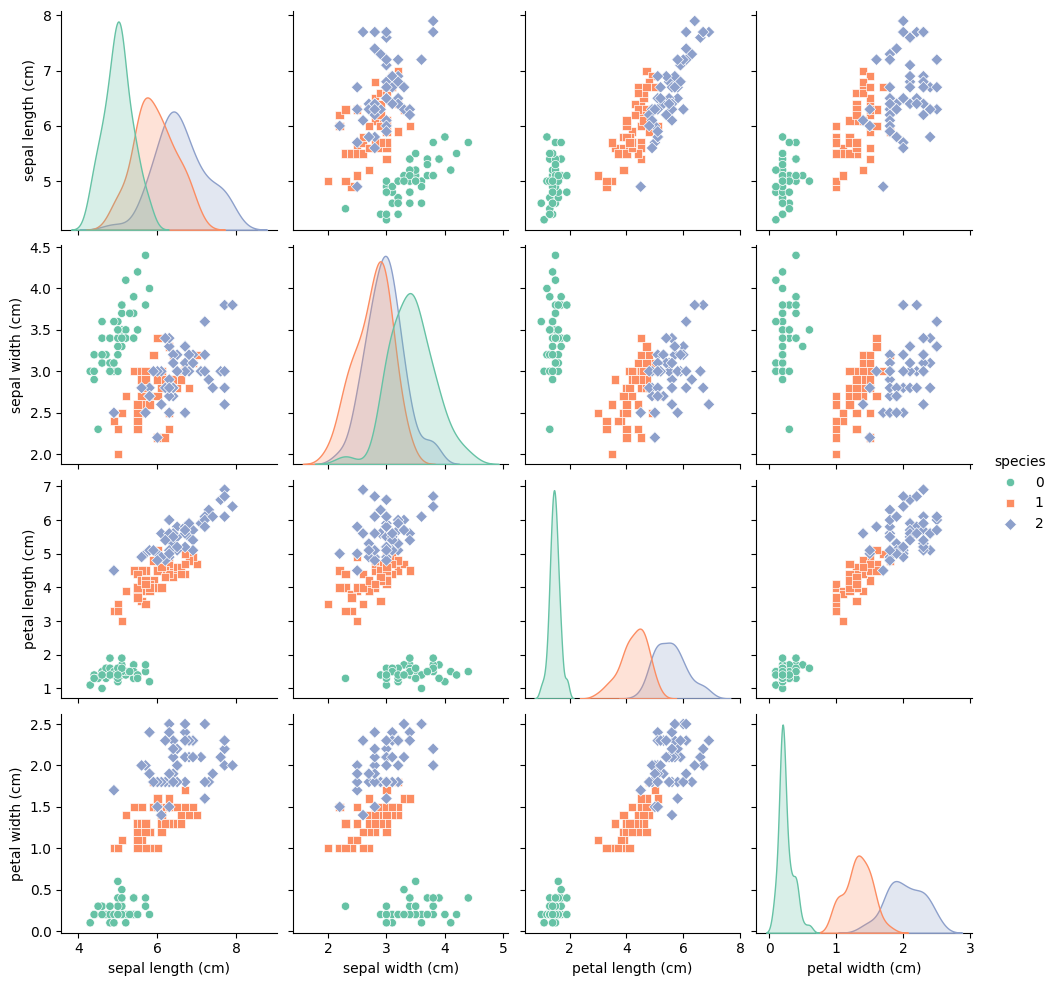

In [51]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the dataset
sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette="Set2")
plt.show()

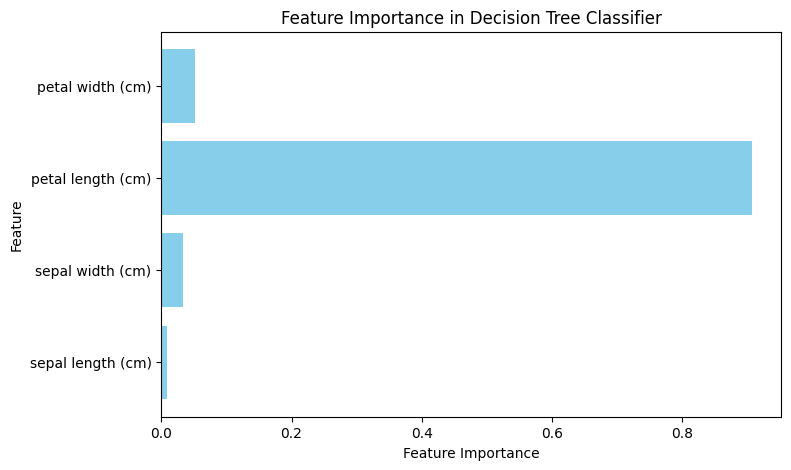

In [53]:
# Plotting feature importance for the Decision Tree
importances = clf.feature_importances_
features = iris.feature_names

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()


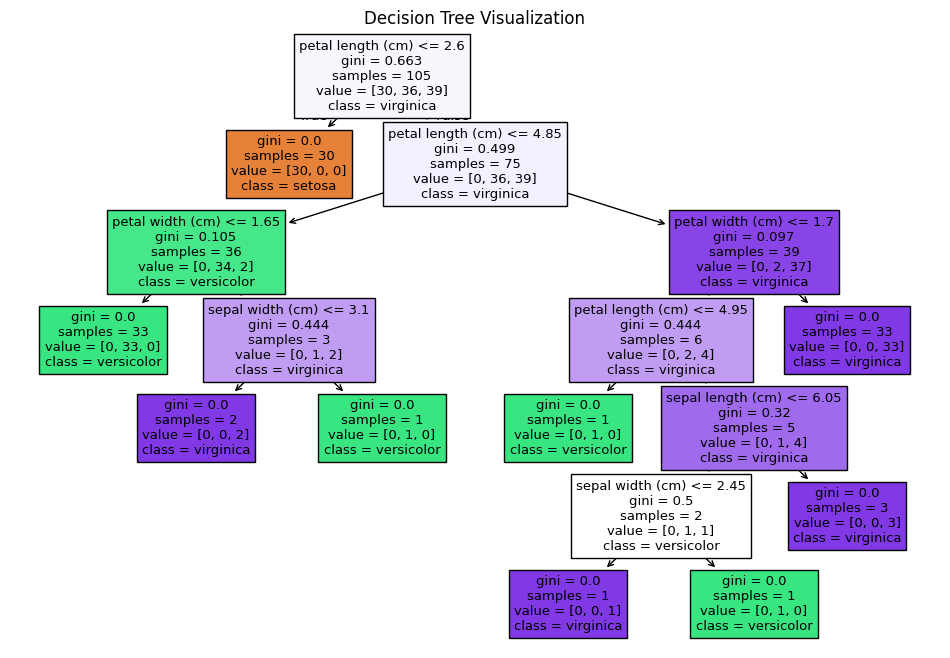

In [54]:
# Import necessary modules for tree visualization
from sklearn import tree
import graphviz

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()


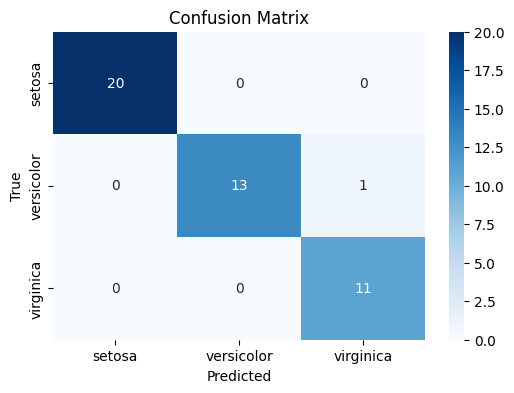

In [55]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


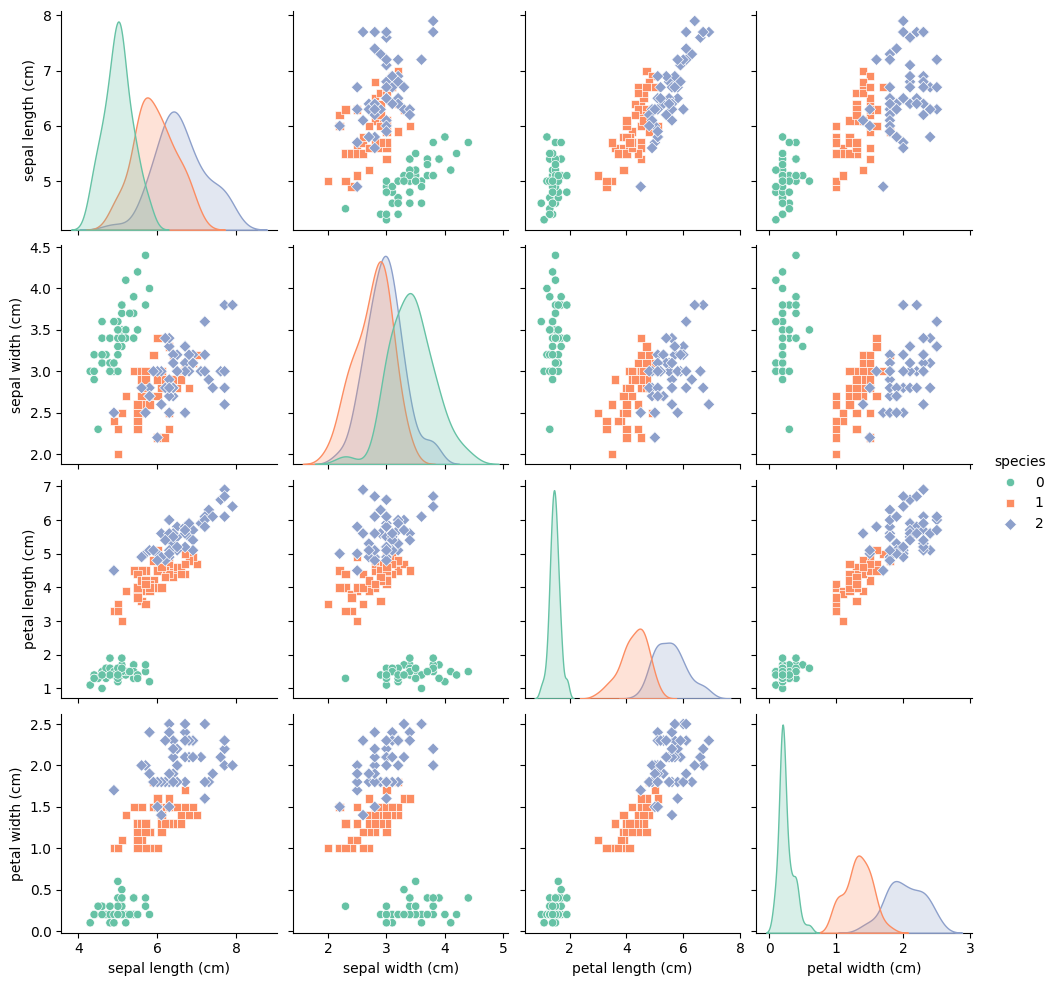

Accuracy: 100.00%


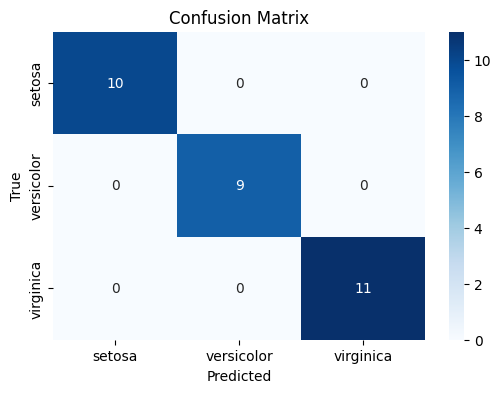

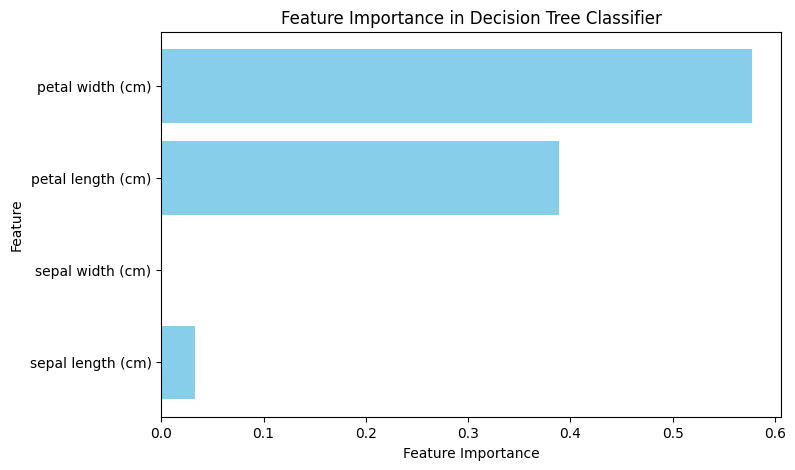

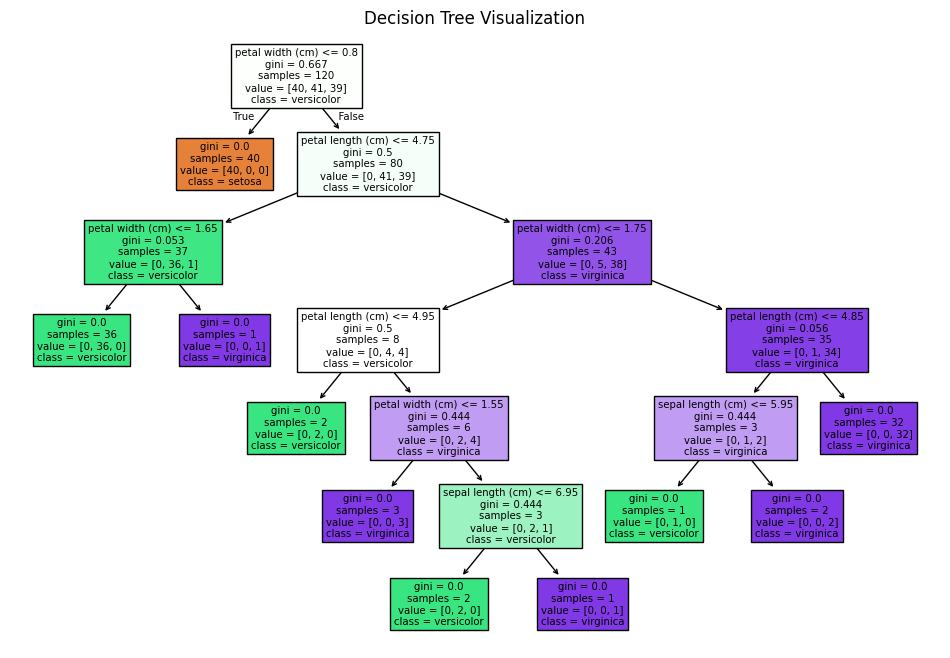

The predicted species for the new sample is: setosa


In [56]:
# Step 1: Import necessary libraries and load the dataset
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()

# Convert to a DataFrame for easy handling
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Visualizing the data with a pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette="Set2")
plt.show()

# Step 2: Split the dataset into training and testing sets
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 4: Test the model and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualizing the feature importance
importances = clf.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()

# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Step 5: Make a prediction on a new sample
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example input
prediction = clf.predict(new_sample)
species_name = iris.target_names[prediction][0]
print(f"The predicted species for the new sample is: {species_name}")


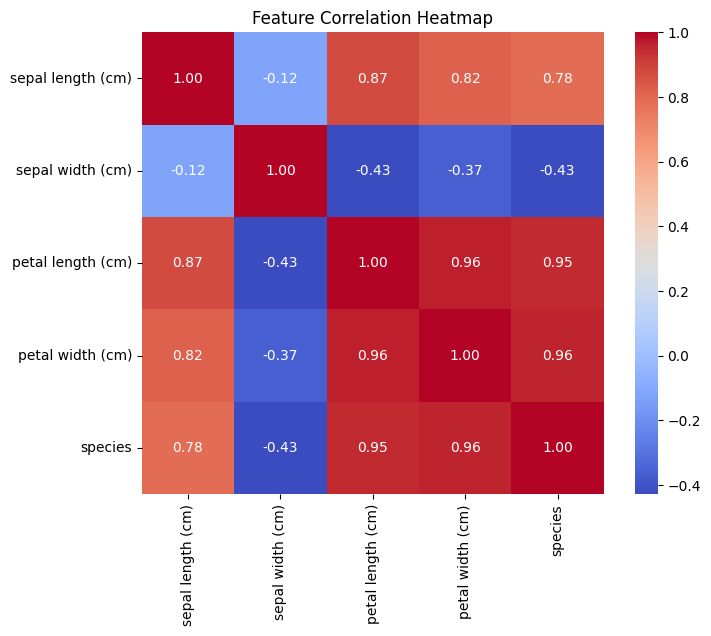

In [57]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


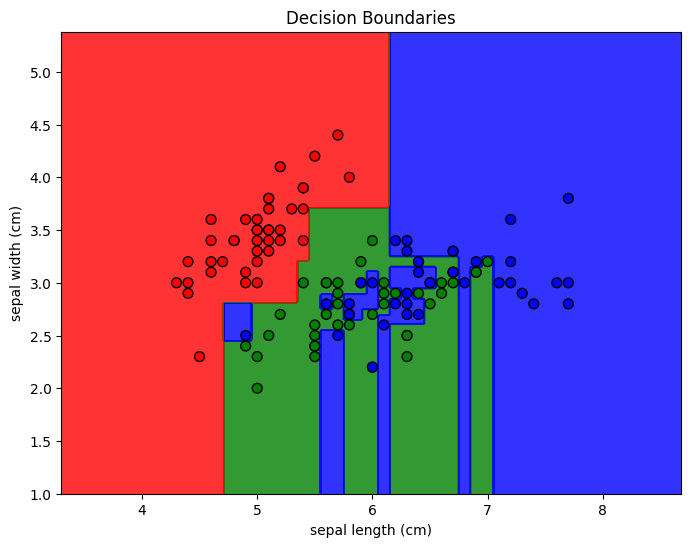

In [58]:
# Import libraries for visualizing decision boundaries
from matplotlib.colors import ListedColormap

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, feature_names):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Decision Boundaries')
    plt.show()

# Use only two features for visualization (e.g., sepal length and sepal width)
X_train_2d = X_train[:, :2]  # Select the first two features for simplicity
clf_2d = DecisionTreeClassifier().fit(X_train_2d, y_train)

# Plot decision boundaries
plot_decision_boundaries(X_train_2d, y_train, clf_2d, iris.feature_names[:2])


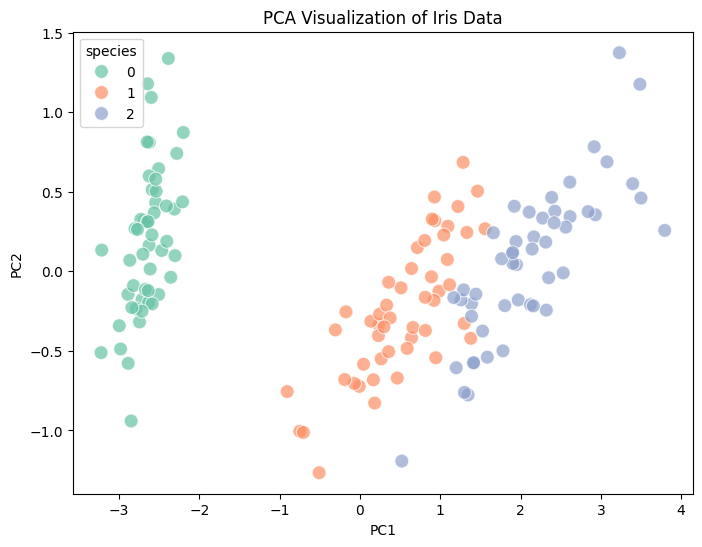

In [59]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the 2 principal components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris.target

# Plot the PCA result
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette="Set2", s=100, alpha=0.7)
plt.title('PCA Visualization of Iris Data')
plt.show()


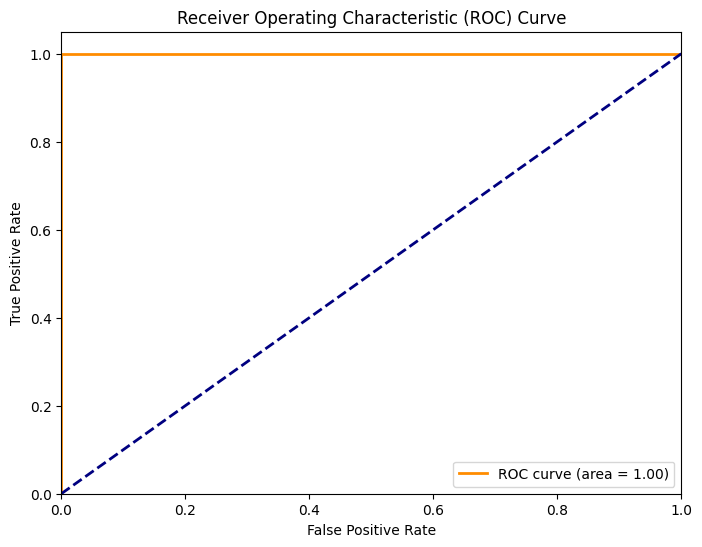

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Binarize the output (Setosa vs others)
y_binary = label_binarize(y, classes=[0, 1, 2])[:, 0]

# Train a Logistic Regression model for binary classification
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)
model_binary = LogisticRegression()
model_binary.fit(X_train_binary, y_train_binary)

# Predict probabilities
y_score = model_binary.decision_function(X_test_binary)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<ipython-input-64-7b2eef37f39c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['species'], y=df[feature], palette="Set2")
<ipython-input-64-7b2eef37f39c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['species'], y=df[feature], palette="Set2")
<ipython-input-64-7b2eef37f39c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['species'], y=df[feature], palette="Set2")
<ipython-input-64-7b2eef37f39c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

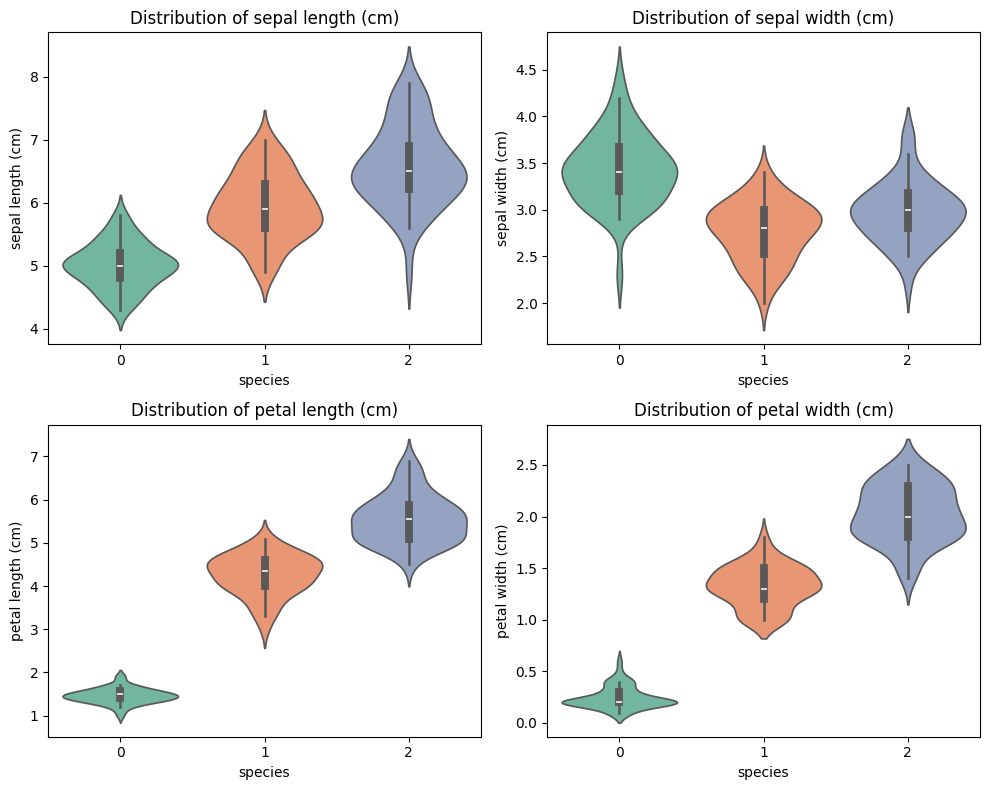

In [64]:
# Create a violin plot to show the distribution of features across species
plt.figure(figsize=(10, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=df['species'], y=df[feature], palette="Set2")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


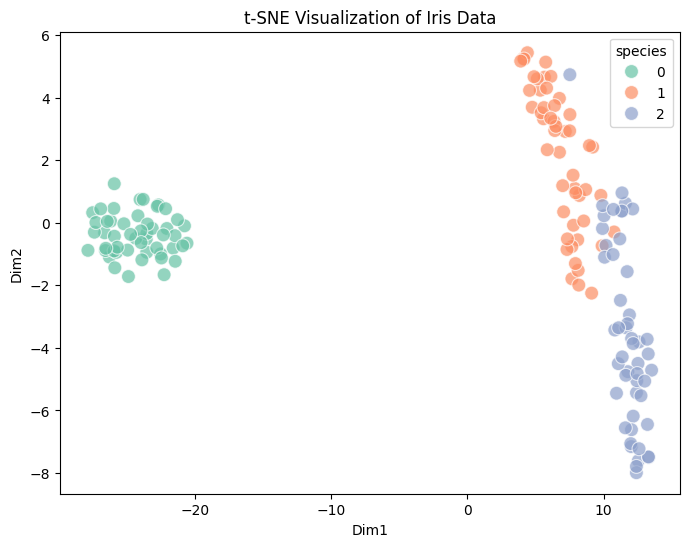

In [65]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the features to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the t-SNE result
tsne_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['species'] = iris.target

# Plot the t-SNE result
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='species', palette="Set2", s=100, alpha=0.7)
plt.title('t-SNE Visualization of Iris Data')
plt.show()
